<a href="https://colab.research.google.com/github/Soniprincy/Machine-Learning/blob/main/Linear_regression_%7C_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Insurance premiums are often based on various factors that in the end decide the amount that will be covered from the insurance company.
As a data analyst/scientist you are given a set of historical data for an organizations customers and the respective charges that were levied upon the insurance company.

The data gives you the information about the users including their age, sex, bmi, hospitalization history, annual income, etc. Analyze and gather insights fron the data and create a linear regression model that will best predict the insurance charges for a new set of data.

## Dataset Information
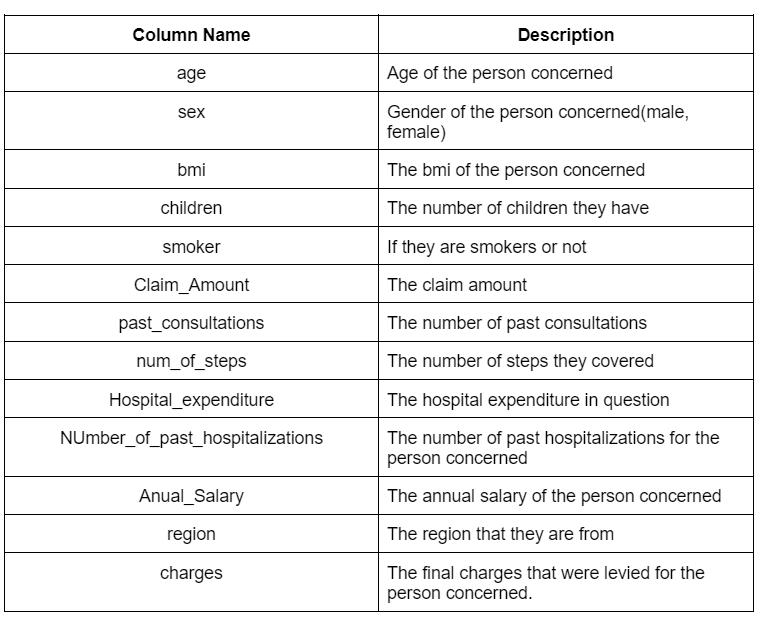

## Importing Initial Python Packages to build an approach towards the business Problem

1.Load the nes.lib

2.load the data set

3.EDA-->
---Shape
---null
---info
--- dupl
---stats
---out
etc...


4.feature eng-->encoding,resclaing etc


5.feature selection-->cor,vif,rfe



6.model build--->lin,log,de etc

7.predicton


8.evalute.

In [1]:
import numpy as np  #numperical python
import pandas as pd #data minipulation
import matplotlib.pyplot as plt #data visual
import seaborn as sns  #data visual

In [2]:
#Load the dataset
insurance=pd.read_csv(r'new_insurance_data (1) (3).csv')
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [3]:
insurance.shape

(1338, 13)

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [5]:
insurance.isna().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [6]:
insurance.round()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.0,0.0,no,29088.0,17.0,715428.0,4720921.0,0.0,5.578497e+07,southeast,1122.0
1,18.0,male,30.0,0.0,no,39054.0,7.0,699157.0,4329832.0,0.0,1.370088e+07,southeast,1132.0
2,18.0,male,33.0,0.0,no,39024.0,19.0,702341.0,6884861.0,0.0,7.352311e+07,southeast,1136.0
3,18.0,male,34.0,0.0,no,28185.0,11.0,700250.0,4274774.0,0.0,7.581968e+07,southeast,1136.0
4,18.0,male,34.0,0.0,no,14698.0,16.0,711584.0,3787294.0,0.0,2.301232e+07,southeast,1137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,36.0,0.0,yes,63142.0,32.0,1091267.0,170380500.0,2.0,3.101107e+09,northwest,55135.0
1334,31.0,female,38.0,1.0,yes,43420.0,31.0,1107872.0,201515185.0,2.0,3.484216e+09,northeast,58571.0
1335,52.0,male,34.0,3.0,yes,52459.0,25.0,1092005.0,223644981.0,2.0,3.640807e+09,northwest,60021.0
1336,45.0,male,30.0,0.0,yes,69928.0,34.0,1106821.0,252892383.0,3.0,4.006359e+09,southeast,62593.0


In [7]:
insurance.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:

insurance.describe(include='all')

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
count,1329.000000,1338,1335.000000,1333.000000,1338,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338,1338.000000
unique,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,male,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,southeast,NaN
freq,NaN,676,NaN,NaN,1064,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,39.310008,NaN,30.665112,1.090773,NaN,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,NaN,13270.422265
std,14.034818,NaN,6.101690,1.201856,NaN,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,NaN,1121.873900
25%,27.000000,NaN,26.302500,0.000000,NaN,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,NaN,9382.033000
75%,51.000000,NaN,34.687500,2.000000,NaN,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,NaN,16639.912515


<ipython-input-9-9abf057d63e2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['age'])


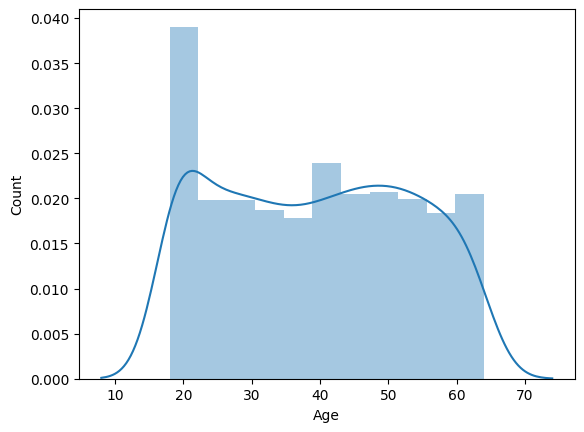

In [9]:
#distribution of age column
sns.distplot(x=insurance['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='age'>

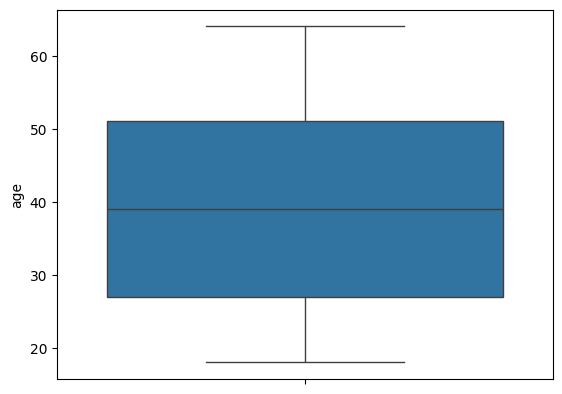

In [10]:
sns.boxplot(insurance['age'])

In [11]:
import plotly.express as px
import pandas as pd

In [12]:
fig=px.box(insurance,y='age')
fig.show()

<ipython-input-13-6567aea8d6e9>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




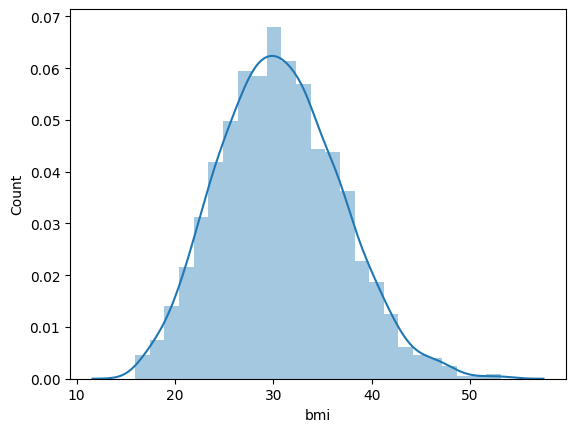

In [13]:
#distribution of age column
sns.distplot(x=insurance['bmi'])
plt.xlabel('bmi')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='bmi'>

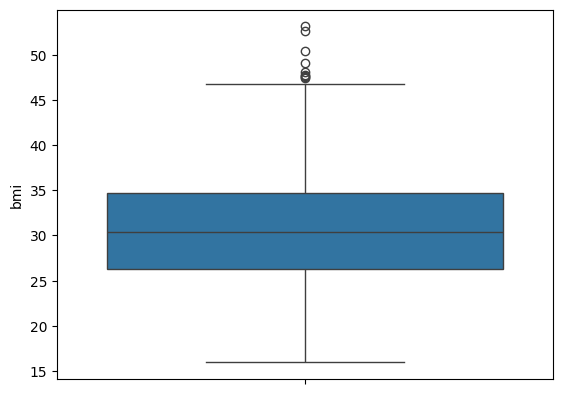

In [14]:
sns.boxplot(insurance['bmi'])

In [15]:
fig=px.box(insurance,y='bmi')
fig.show()

In [16]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 87.1 MB/s eta 0:00:00


In [17]:
import sweetviz as sv

In [18]:
report = sv.analyze(insurance)
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
insurance.isna().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [20]:
insurance['age']=insurance['age'].fillna(insurance['age'].median())
insurance['bmi']=insurance['bmi'].fillna(insurance['bmi'].median())
insurance['children']=insurance['children'].fillna(insurance['children'].median())
insurance['Claim_Amount']=insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].median())
insurance['past_consultations']=insurance['past_consultations'].fillna(insurance['past_consultations'].median())
insurance['num_of_steps']=insurance['num_of_steps'].fillna(insurance['num_of_steps'].median())
insurance['Hospital_expenditure']=insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations']=insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary']=insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())



In [21]:
insurance.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [22]:
#removing
#removing

In [23]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
insurance['sex']=le.fit_transform(insurance['sex'])

In [27]:
insurance['smoker']=le.fit_transform(insurance['smoker'])

In [28]:
insurance['region']=le.fit_transform(insurance['region'])

In [29]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,2,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,2,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,2,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,2,1137.0110


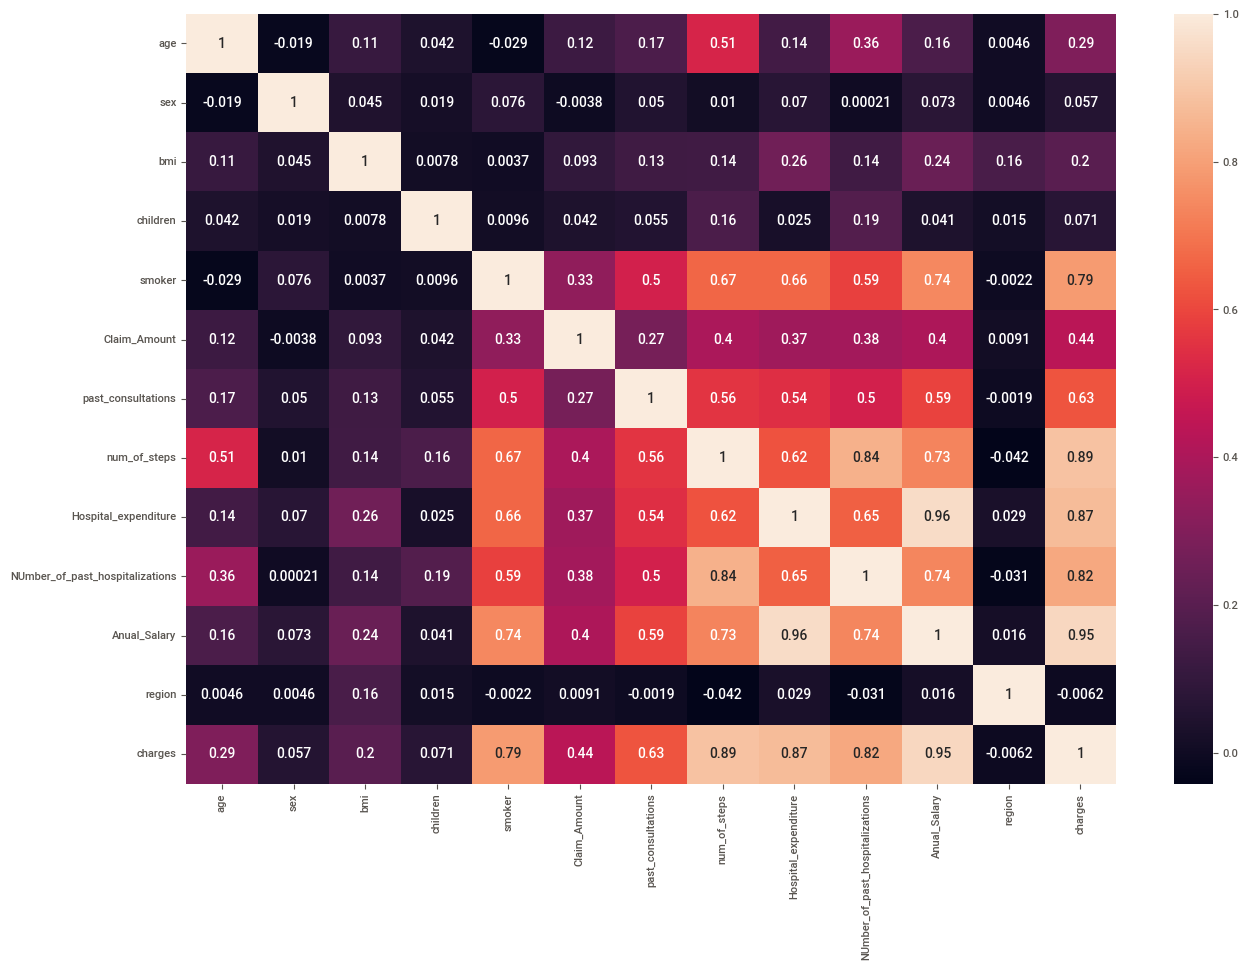

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(data=insurance.corr(), annot=True)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = insurance.drop(['age','sex','bmi','children','region'],axis=1)
y = insurance['charges']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()

In [36]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [37]:
y_train_arr = y_train.values
y_train = y_train_arr.reshape((-1,1))

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(x_test)
y_pred

array([[ 8644.66798139],
       [23651.92673752],
       [19687.36720402],
       [ 7183.98693613],
       [12685.43840437],
       [ 4971.84903225],
       [ 7470.42272331],
       [ 9568.94761595],
       [12164.04566393],
       [11809.57506199],
       [ 1998.40697611],
       [ 8430.51472711],
       [28429.59738271],
       [12203.46868178],
       [ 3490.96508899],
       [ 6705.51486747],
       [ 1374.39422903],
       [12517.29867926],
       [ 6960.74367306],
       [14899.57206994],
       [ 5112.35042344],
       [11394.96637514],
       [ 2304.44585244],
       [ 5041.82206408],
       [ 7365.45490765],
       [11400.71609576],
       [ 2026.33011176],
       [46756.68851963],
       [11008.4652533 ],
       [ 2455.76926798],
       [15486.34651   ],
       [11800.88444806],
       [ 5003.99116886],
       [ 4449.34751081],
       [25746.40002669],
       [10686.8029054 ],
       [ 1655.64548947],
       [ 7682.3418798 ],
       [ 6045.16981025],
       [20851.75943605],


In [42]:
from sklearn.metrics import *

In [43]:
r2_score(y_pred,y_test)

0.9790251892518755

In [44]:
mean_squared_error(y_pred,y_test)

3180247.585859296